In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mtcnn
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.2 MB/s eta 0:00:00


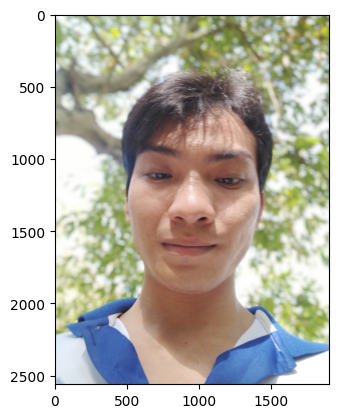

In [ ]:
img = cv.imread("/content/drive/MyDrive/LVTN/face_recognition_Facenet/dataset/Truong An/3.jpg")
# opencv BGR channel format and plt reads images as RGB channel format
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 [==============================] - 1s 817ms/step


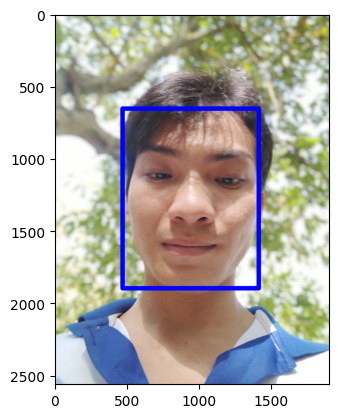

In [ ]:
results
x,y,w,h = results[0]['box']
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), (30))
plt.imshow(img)

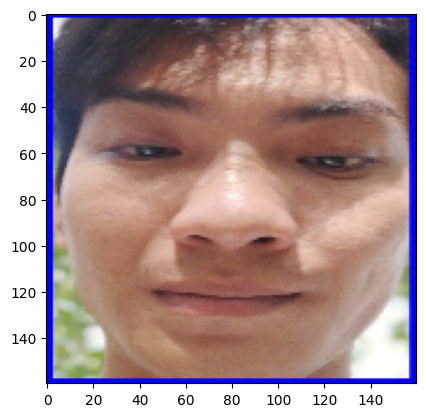

In [ ]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [ ]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 12,  10, 218],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 46,  47, 253],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [ ]:
from mtcnn.mtcnn import MTCNN
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
        # List to save information about the number of extracted images
        self.extracted_info = []
        self.unextracted_images = []

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        try:
            faces = self.detector.detect_faces(img)
            if faces:
                x, y, w, h = faces[0]['box']
                x, y = abs(x), abs(y)
                face = img[y:y + h, x:x + w]
                face_arr = cv.resize(face, self.target_size)

                if face_arr is not None:
                    return face_arr, None
                else:
                    return None, "Face extraction failed"

            else:
                return None, "No face detected"

        except Exception as e:
            return None, f"Face extraction error: {str(e)}"

    def load_faces(self, dir):
        total_images = len(os.listdir(dir))
        extracted_faces = 0
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = os.path.join(dir, im_name)
                single_face, error = self.extract_face(path)
                # Check the return value from extract_face()
                if single_face is not None:
                    FACES.append(single_face)
                    extracted_faces += 1
                else:
                    # Save information about unextracted
                    # images to the unextracted_images list
                    file_name = os.path.basename(path)
                    label_unextracted = os.path.dirname(path)
                    self.unextracted_images.append({
                        'Label unextracted': label_unextracted,
                        'File_name': file_name, 'Error': error})
            except Exception as e:
                pass
        self.extracted_info.append({'Label': dir, 'Total_images': total_images,
                                    'Extracted_faces': extracted_faces})
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            self.X.extend(FACES)
            self.Y.extend(labels)
        return np.asarray(self.X), np.asarray(self.Y)


In [ ]:
faceloading = FACELOADING("/content/drive/MyDrive/LVTN/face_recognition_Facenet/dataset")
X, Y = faceloading.load_classes()

1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 0s 35ms/step


In [ ]:
from prettytable import PrettyTable
# Table to print face extraction information in the dataset
table = PrettyTable()
table.field_names = ["Label", "Total_images", "Extracted_faces"]

for info in faceloading.extracted_info:
    label = info['Label']
    label_name = label.split('/')[-1]
    total_images = info['Total_images']
    extracted_faces = info['Extracted_faces']
    table.add_row([label_name, total_images, extracted_faces])

print(table)

# The table prints a list of images for which
# faces could not be extracted from the dataset
table1 = PrettyTable()
table1.field_names = ["Label Unextracted", "File Name", "Error"]

# Check if the list is not empty
if faceloading.unextracted_images:
    for info in faceloading.unextracted_images:
        label_unextracted = info['Label unextracted'].split('/')[-1]
        file_name = info['File_name']
        error = info['Error']
        table1.add_row([label_unextracted, file_name, error])

    print("\nList of Unextracted face images:")
    print(table1)

+------------+--------------+-----------------+
|   Label    | Total_images | Extracted_faces |
+------------+--------------+-----------------+
| Bich Huyen |      30      |        30       |
|  Thi Dong  |      30      |        30       |
| Hoang Hao  |      30      |        30       |
| Quoc Vinh  |      30      |        30       |
|  Dang Tam  |      30      |        30       |
| Truong An  |     150      |       150       |
+------------+--------------+-----------------+


In [ ]:
plt.figure(figsize=(60,60))
for num,image in enumerate(X):
    ncols = 10
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install keras-facenet
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [ ]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

In [ ]:
save_path = "/content/drive/MyDrive/LVTN/face_recognition_Facenet/faces_embeddings_done_4classes.npz"
np.savez_compressed(save_path, EMBEDDED_X, Y)
print("File saved successfully.")

File saved successfully.


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    EMBEDDED_X, Y, shuffle=True, random_state=6
)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, ypreds_train)

1.0

In [30]:
accuracy_score(Y_test,ypreds_test)

1.0

In [ ]:
import pickle
#save the model
with open('/content/drive/MyDrive/LVTN/face_recognition_Facenet/svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)

In [ ]:
import os
import cv2 as cv
import numpy as np
import time
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=DataConversionWarning)

detector = MTCNN()

test_folder = "/content/drive/MyDrive/LVTN/face_recognition_Facenet/test"
predictions = []

for filename in os.listdir(test_folder):
    start_time = time.time()
    test_image = cv.imread(os.path.join(test_folder, filename))
    test_image = cv.cvtColor(test_image, cv.COLOR_BGR2RGB)
    x, y, w, h = detector.detect_faces(test_image)[0]['box']

    face_image = test_image[y:y+h, x:x+w]
    face_image = cv.resize(face_image, (160, 160))
    test_embedding = get_embedding(face_image)

    # Utilize feature vectors for prediction
    ypred = model.predict([test_embedding])

    predicted_name = encoder.inverse_transform([ypred])[0]
    accuracy = model.predict_proba([test_embedding]).max() * 100

    end_time = time.time()
    process_time = end_time - start_time

    predictions.append((filename, predicted_name, accuracy, process_time))


1/1 [==============================] - 0s 105ms/step


In [32]:
from sklearn.metrics import accuracy_score

true_labels = [' '.join(filename.split(' ')[:-1]) for filename, _, _, _ in predictions]
predicted_labels = [predicted_name for _, predicted_name, _, _ in predictions]

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy of the Test set is: {accuracy}")

Accuracy of the Test set is: 1.0


In [33]:
total_process_time = sum(process_time for _, _, _, process_time in predictions)
average_process_time = total_process_time / len(predictions) if len(predictions) > 0 else 0

print(f"Average processing time per image: {average_process_time:.4f} seconds")

Average processing time per image: 4.8829 seconds


In [ ]:
from prettytable import PrettyTable
table1 = PrettyTable()
table2 = PrettyTable()

# Define field names for both tables
field_names = ["Image", "Predicted", "Accuracy", "Processing Speed", "Result"]

# Add field names to tables
table1.field_names = field_names
table2.field_names = field_names

for filename, predicted_name, accuracy, process_time in predictions:
    true_label = ' '.join(filename.split(' ')[:-1])

    # Define result based on comparison of true_label and predicted_name
    result = "Yes" if true_label == predicted_name else "No"

    # Prepare data for tables based on result
    table_data = [filename, predicted_name, f"{accuracy:.2f}%",
                  f"{process_time:.4f} sec", result]

    if result == "Yes":
        table1.add_row(table_data)
    else:
        table2.add_row(table_data)

# Set title for Table 1
table1.title = "List of correctly predicted images"
if len(table1._rows) > 0:
    print(table1)
else:
    print("There are no correct predictions")
print('\n')

table2.title = "List of incorrectly predicted images"
if len(table2._rows) > 0:
    print(table2)
else:
    print("There are no wrong predictions")

In [29]:
total_accuracy = 0
num_correct_predictions = 0

for row in table1._rows:
    accuracy_str = row[field_names.index("Accuracy")]
    accuracy = float(accuracy_str[:-1])
    total_accuracy += accuracy
    num_correct_predictions += 1

average_accuracy = total_accuracy / num_correct_predictions if num_correct_predictions > 0 else 0
print(f"Average accuracy of correctly predicted images: {average_accuracy:.2f}%")


Average accuracy of correctly predicted images: 89.43%
